Nome: Vinícius Esperança Mantovani

RA: 247395

Curso: Engenharia de Computação

# Ex02 - Histograma e Extração de Características

Esta atividade tem 2 objetivos principais:
  - Entender o conceito de histograma e estatísticas da imagem;
  - Explorar diferentes formas de extração de características em histogramas e sua aplicação em um problema de classificação.

In [ ]:
# Importando as bibliotecas que serão utilizadas
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import random

# Definindo o nome da pasta compartilhada
# IMPORTANTE: substitua "NOME_DA_PASTA_COMPARTILHADA" abaixo pelo nome correspondente
pasta_compartilhada = "G_EA979A_2024S1"

In [ ]:
# Conexão do colab com o drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Parte 1 - Histograma

Leia o notebook [Histograma de imagens](https://github.com/lrittner/Computacao-Visual/blob/master/tutoriais/05_Histograma_da_imagem.ipynb) para entender o conceito de histograma e o uso da função *np.histogram*. Tente também entender a função a seguir, que plota o histograma usando gráfico de barras. Essa função será muito útil nos exercícios deste notebook.

In [ ]:
def plota_hist(h,cor,nbins,bin_edges):

    w=255./nbins
    bin_centers = bin_edges[1:]-(w/2)
    plt.bar(bin_centers, h, width=w, color=cor)

### Exercício 1.1

Vamos tentar calcular o histograma de imagens coloridas. Para isso, utilize as imagens tiradas durante o dia ou durante a noite, disponíveis em *Dados/Ex02/Example* e apresentadas no código abaixo.

Plote os histogramas de cada uma das bandas das imagens usando gráficos de barras (função "**plota_hist**"). Compare visualmente os histogramas e comente as principais diferenças observadas. Se você tivesse que dizer quais histogramas pertencem a quais classes de imagem (dia ou noite), você seria capaz de acertar? Explique porque.

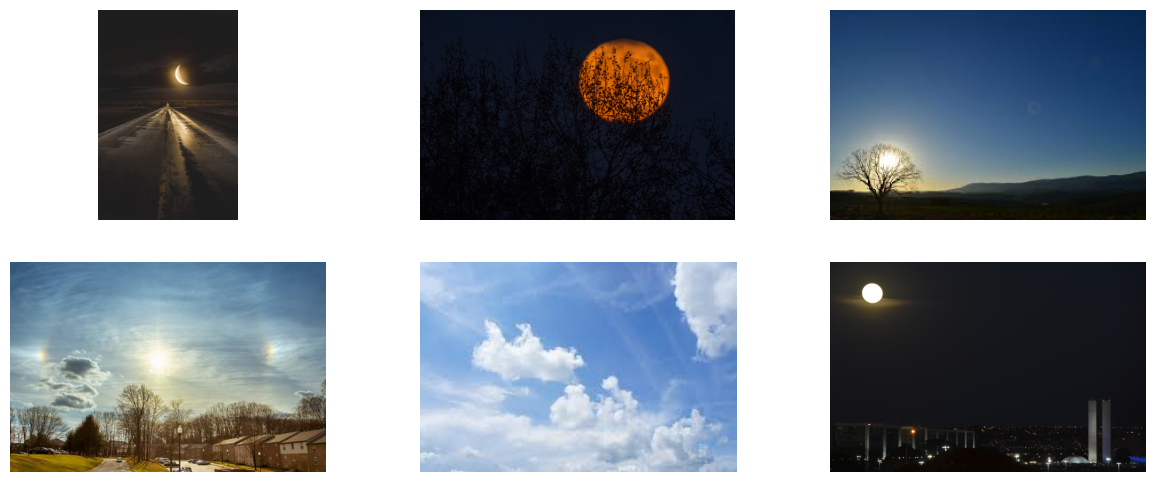

In [ ]:
path = f"gdrive/MyDrive/{pasta_compartilhada}/Dados/Ex02/Example/"

fig, axs = plt.subplots(2,3,figsize=(15, 6))

list_files = os.listdir(path)
for i, file in enumerate(list_files):
  plt.subplot(2,3,1+i)
  plt.axis('off')
  img = mpimg.imread(path+file)

  plt.imshow(img)

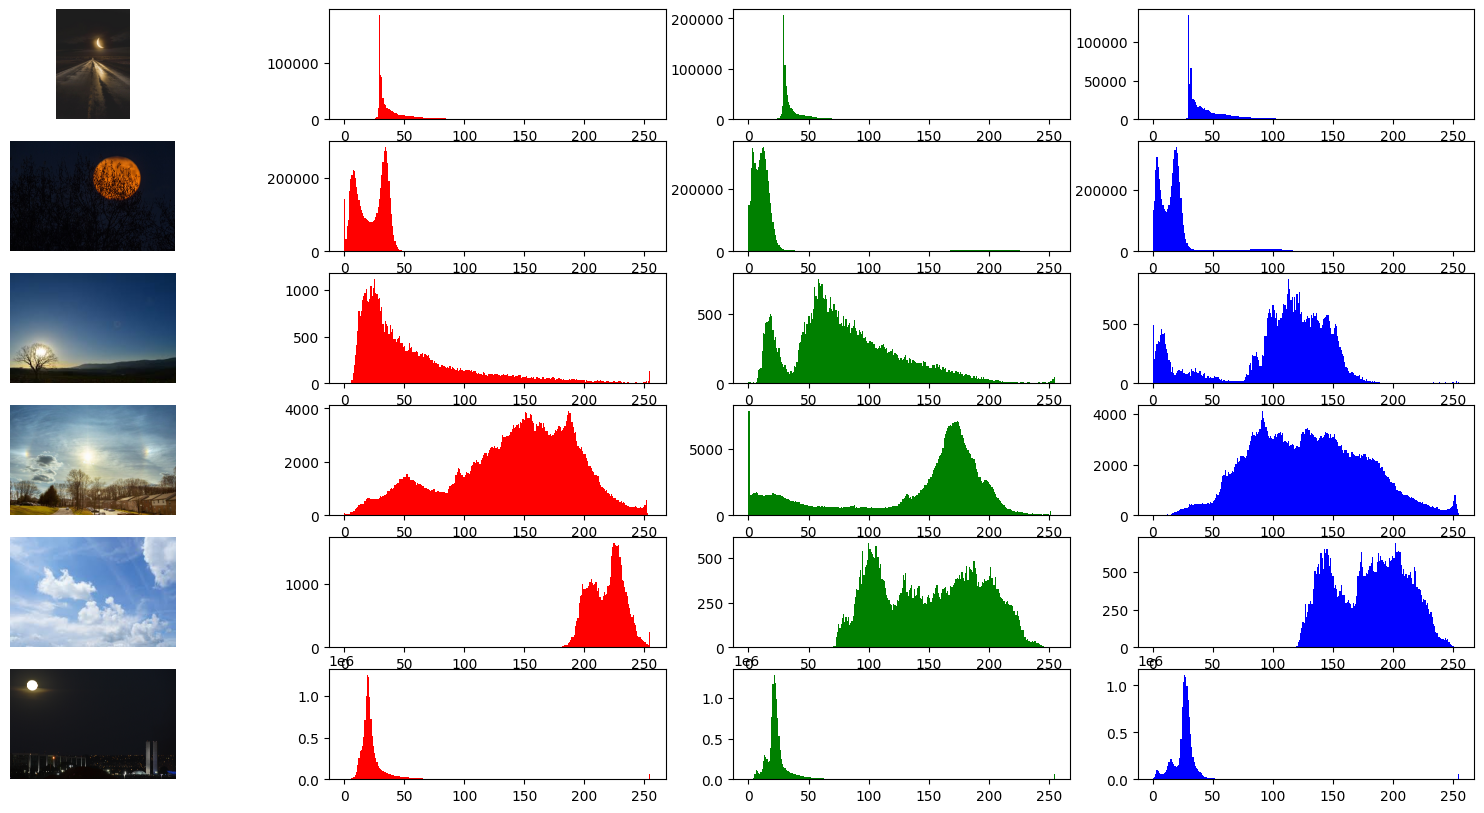

In [ ]:
list_files = os.listdir(path)
fig, axs = plt.subplots(6,4,figsize=(20, 10))
j = -1

for i, file in enumerate(list_files):
  j = j + 1
  plt.subplot(6,4,1+j)
  plt.axis('off')
  img = mpimg.imread(path+file)
  plt.imshow(img)

  for color in ['red', 'green', 'blue']:
    j = j+1
    plt.subplot(6,4,1+j)
    plt.axis('on')
    h, bin_edges = np.histogram(img[:,:,j%3], 256,(0,255))
    plota_hist(h,color,256,bin_edges)

# Comparando visualmente os histogramas, percebe-se que, aqueles que estao associados
# a fotos noturnas, tem uma concentracao maior de pontos proximos de 0 (menos intensas) em todas as tres escalas
# (vermelho, verde e azul), enquanto que os histogramas relacionados a imagens tiradas durante
# o dia tem maior concentracao de valores mais proximos de 255 (mais intensas). Isso se da, por conta da intensidade
# baixa de luzes nas fotos noturnas, que contrasta com a grande intensidade nas fotos diurnas. Alem disso, eh
# possivel notar que as fotos noturnas tem histogramas "encurtados" para as tres cores, ou seja, existe uma concentracao
# muito preponderante de determinadas cores (mais escuras) de cada uma das escalas do RGB, o que significa que os pontos da imagem
# tem todos cores parecidas entre si. Isto se difere das fotos diurnas, que por sua vez tem uma alta variedade de
# cores para cada uma dos tres componentes do RGB e, consequentemente, para a imagem no geral.
# Assim, seria possivel, sim, classificar visualmente as imagens em duas classes (diurnas e noturnas) e, talvez ainda,
# classificar em mais uma, que estaria relacionada ao amanhecer ou por do sol, uma vez que na foto em que isso eh
# retratado (terceira abaixo), as concentracoes de cores tendem a valores proximos do 0, mas se distribuem
# por uma ampla gama de valores, indicando preponderancia de cores escuras, mas apresentando ainda a presenca de
# cores mais claras.

### Exercício 1.2

Selecione duas imagens coloridas do item anterior (uma de dia e uma de noite) e faça a conversão para níveis de cinza, usando um dos métodos abaixo:
   - médias das bandas R, G, B;
   - média ponderada das bandas R, G, B: procure qual a poderação mais utilizada;
   - convert(L) da biblioteca PIL;

Em seguida, calcule o histograma das imagens convertidas para níveis de cinza. Compare os histogramas em níveis de cinza e discuta novamente as diferenças.   

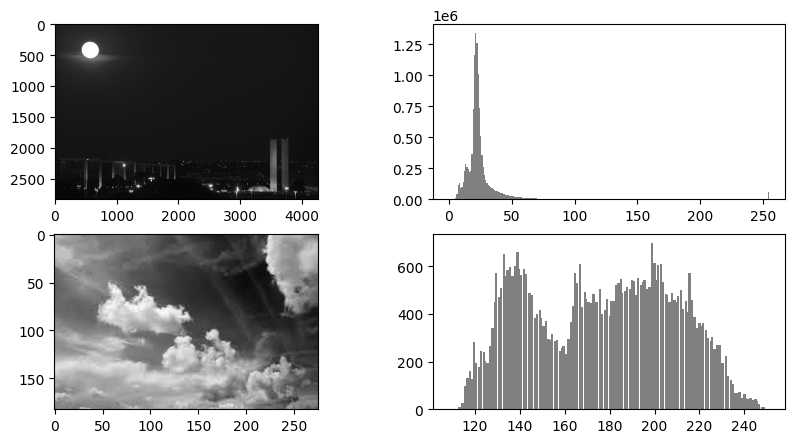

In [ ]:
# primeira img
fig, axs = plt.subplots(2,2,figsize=(10, 5))
plt.subplot(2,2,1)
plt.axis('off')
img = Image.open(path+"noite_3.jpg")
img1 = img.convert('L')
plt.imshow(img1, cmap='gray')

# histograma primeira img
h, bin_edges = np.histogram(img1, 256)
plt.axis('on')
plt.subplot(2,2,2)
plota_hist(h, 'gray', 256, bin_edges)

# seegunda img
plt.subplot(2,2,3)
plt.axis('off')
img = Image.open(path+"dia_1.jpeg")
img2 = img.convert('L')
plt.imshow(img2, cmap='gray')

# histograma segunda img
h, bin_edges = np.histogram(img2, 256)
plt.axis('on')
plt.subplot(2,2,4)
plota_hist(h, 'gray', 256, bin_edges)

# Agora, pode-se observar que, mesmo em escala de cinza, ainda podemos classificar facilmente imagens
# entre diurnas e noturnas. Isso porque, conforme se percebe ao analisar o histograma, a foto noturna
# mantem sua caracteristica de ter uma grande concentracao de pontos com cores muito semelhantes, o que
# se expressa como uma concentracao grande dos valores do histograma em uma pequena faixa da escala.
# Além disso, essa pequena faixa de cores na qual estao presente todos os pontos no histograma
# da imagem noturna, tem-se tambem, a proximidade deles ao valor 0 (escuro), de modo igual ao que
# ocorre com os histogramas de imagens noturnas em RGB. Enquanto isso, tambem de maneira igual aquela
# apresentada no exercicio anterior, os histogramas das fotos diurnas diferem das noturnas por terem
# uma faixa maior de cores pela qual seus pontos estao distribuidos, sendo, portanto, mais
# "esticados" na horizontal seu histograma. Ademais, ainda conforme o exercicio anterio, o histograma
# diruno difere do noturno, tambem, por ter seus pontos mais proximos do valor 255 (claro). Logo,
# aparenta ser, ainda, possivel classificar as imagens em dois grupos (diurnas e noturnas)

## Parte 2 - Extraindo atributos derivados do histograma

Histogramas podem ser utilizados para extrair atributos de imagens. Estes dados são úteis em tarefas de aprendizado de máquina, como a classificação de imagens.

Dentre os atribitos mais comuns usados para a classificação de imagens, estão: *média*, *variância*, *assimetria* e *curtose*.

A função abaixo calcula, dada uma imagem em níveis de cinza, o histograma e seus atributos. Além dos atributos listados acima, ela também calcula os percentis 1, 10, 50, 90 e 99%.

In [ ]:
def histstat(f):

    h, bin_edges = np.histogram(f, 256, (0,255))
    hn = 1.0*h/h.sum() # compute the normalized image histogram
    cum_hn = np.cumsum(hn) # compute the cumulative image histogram
    v = np.zeros(9) # number of statistics

    # compute statistics
    n = len(h) # number of gray values
    v[0]  = np.sum((np.arange(n)*hn)) # mean
    v[1]  = np.sum(np.power((np.arange(n)-v[0]),2)*hn) # variance
    v[2]  = np.sum(np.power((np.arange(n)-v[0]),3)*hn)/(np.power(v[1],1.5)) # skewness
    v[3]  = np.sum(np.power((np.arange(n)-v[0]),4)*hn)/(np.power(v[1],2))-3 # kurtosis
    v[4] = np.where(cum_hn >= 0.01)[0][0] # 1% percentile
    v[5] = np.where(cum_hn >= 0.1)[0][0] # 10% percentile
    v[6] = np.where(cum_hn >= 0.5)[0][0] # 50% percentile
    v[7] = np.where(cum_hn >= 0.9)[0][0] # 90% percentile
    v[8] = np.where(cum_hn >= 0.99)[0][0] # 99% percentile

    return v

Se quisermos então extrair os atributos de histograma de uma das imagens tiradas durante o dia, basta fazermos:

In [ ]:
f = mpimg.imread(path+list_files[4])
f_gray = np.uint8(0.3*f[:,:,0]+0.59*f[:,:,1]+0.11*f[:,:,2]) # Conversão para níveis de cinza
hist_features = histstat(f_gray)
for feature in hist_features:
  print(f'{feature:.2f}')

175.75
1035.83
-0.03
-1.11
118.00
132.00
178.00
218.00
237.00


### Exercício 2.1

Extraia agora os atributos de uma das imagens tiradas durante a noite e compare com os atributos da imagem anterior. Eles parecem suficientemente diferentes para distinguir uma da outra?

In [ ]:
# Atencao: o bloco de codigo acima apresentava como imagem tirada durante o dia a imagem em path+list_files[0]. No entanto
# a imagem nesse endereco eh uma imagem noturna, portanto, procurei pelo endereco cujas features coincidissem com aquelas
# amostradas na resposta do bloco de codigo acima que estava apresentada por padrao no notebook.

f = mpimg.imread(path+list_files[5])
f_gray = np.uint8(0.3*f[:,:,0]+0.59*f[:,:,1]+0.11*f[:,:,2]) # Conversão para níveis de cinza
hist_features = histstat(f_gray)
for feature in hist_features:
  print(f'{feature:.2f}')

# Os atributos da imagem escolhida parecem ser suficientes para distinguir entre esta e a anterior, ja que:
# - a media do histograma da imagem abaixo eh bastante baixa, o que indica uma preponderancia de pontos de valor proximo a
# zero na escala de cinza, indicando que eh uma imagem majoritariamente escura, enquanto que, a media do histograma da imagem
# anterior eh muito mais alta, o que indica uma imagem bastante mais clara que a anterior.
# - a variancia do histograma da imagem anterior eh quase o dobro da variancia da imagem abaixo, logo, podemos perceber que a
# imagem acima tem seus pontos com cores mais variadas (como as imagens que vimos nos primeiros exercicios), enquanto
# que a imagem abaixo tem uma variancia menor, indicando que todos os seus pontos tem cores de valores semelhantes entre si
# (caracteristica de imagens noturnas conforme vimos nos primeiros exercicios pelos histogramas).
# - a assimetria da imagem anterior nos indica um desbalanceamento para a direita, caracteristico das imagens de dia que vimos nos
# exercicios anteriores, enquanto que a assimetria da figura abaixo indica desbalanceamento para a esqueda, caracteristico de
# fotos noturnas.
# - a curtose da imagem anterior mostra que o histograma daquela imagem eh menos achatado, o que significa que existe uma
# distribuicao mais uniforme ou que, ao menos, os pontos nao tem cores extremamente concentradas em uma determinada faixa. Isso indica que,
# essa imagem, como vimos pelos histogramas dos exercicios anteriores, eh uma imagem diurna. Ao contrario disso, uma imagem
# noturna, como a deste exercicio, apresenta uma curtose alta, pois conforme vimos pelos histogramas, sua curva deve ser bem
# achatada e estar presente em um pequeno intervalo de cores.
# - por fim, por meio dos percentis, podemos notar que, as diferencas na forma como os pontos estao distribuidos quanto a sua
# cor na escala de cinza, do mesmo modo como notamos pela variancia e pela media conjuntamente.

25.47
523.00
6.96
60.49
7.00
13.00
21.00
36.00
120.00


## Parte 3 - Classificação de imagens utilizando atributos derivados do histograma

### O classificador dos K-vizinhos mais próximos (KNN ou K-Nearest Neighbors)

[KNN (K-Nearest Neighbors)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) é um algoritmo de classificação que usa uma abordagem baseada em instâncias, ou seja, ele classifica uma nova amostra com base nas amostras mais próximas (vizinhas) a ela. O KNN se baseia na suposição de que amostras próximas no espaço de atributos estão mais propensas a pertencer à mesma classe.

Para classificar imagens usando o algoritmo KNN, primeiro o conjunto de dados de treinamento é utilizado para construir uma representação dos dados que permita a busca dos vizinhos mais próximos.

Em seguida, para classificar uma nova amostra, o algoritmo encontra as K amostras mais próximas na representação construída, em que K é um parâmetro definido pelo usuário.

Por fim, a classe da nova amostra é determinada pela classe mais comum entre os vizinhos encontrados.



### Exemplo de uso do KNN:

Um conjunto de dados de duas classes é gerado aleatoriamente e, em seguida, o modelo KNN é treinado com k=5 vizinhos próximos. Note que a função **KNeighborsClassifier()** foi importada da biblioteca **sklearn.neighbors** e foi utilizada para criar o modelo KNN. A função *fit()* foi utilizada para treinar o modelo

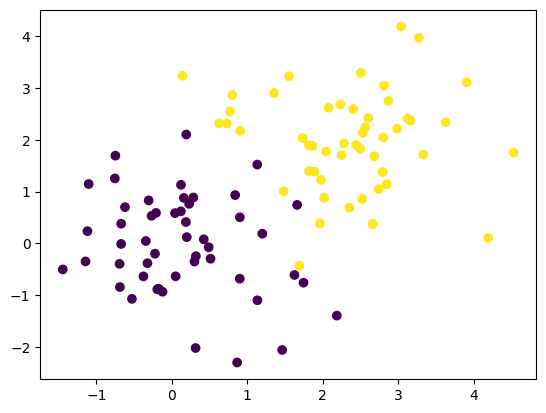

In [ ]:
# Geração de dados aleatórios
np.random.seed(1)
X1 = np.random.randn(50, 2)  # 50 amostras da classe 1
X2 = np.random.randn(50, 2) + 2  # 50 amostras da classe 2
X = np.concatenate((X1, X2))
Y = np.concatenate((np.zeros(50), np.ones(50))) # rótulos das classes (0 e 1)

# Visualizando as amostras (coloridas por classe)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

# Criando o modelo KNN
model = KNeighborsClassifier(n_neighbors=5)

# Treinando o modelo
model.fit(X, Y);

Em seguida, novas amostras aleatórias foram criadas para teste e o modelo foi utilizado para classificá-las.

A função *predict()* é utilizada para classificar as novas amostras.



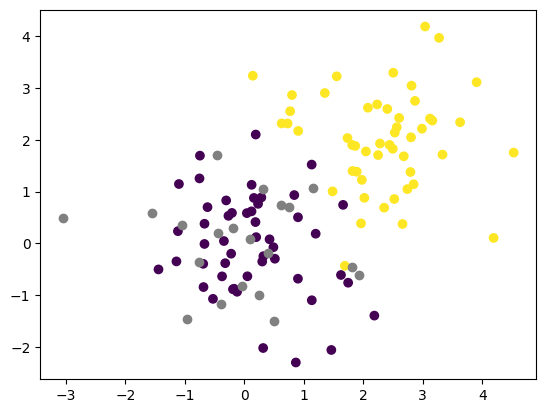

In [ ]:
# Criando novas amostras aleatórias para teste
X_test = np.random.randn(20, 2)

#  Visualizando o conjunto de teste
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(X_test[:,0],X_test[:,1],c='gray')
plt.show()

# Classificando as amostras
Y_test_pred = model.predict(X_test)

Para avaliar a qualidade de um classificador, normalmente se utiliza as seguintes métricas:

- [Acurácia (accuracy_score)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html): mede a proporção de amostras classificadas corretamente pelo modelo.
- [Precisão (precision_score)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html): mede a proporção de amostras classificadas como positivas (1) que são realmente positivas.
- [Recall (recall_score)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html): mede a proporção de amostras positivas (1) que são corretamente identificadas pelo modelo.
- [F1-Score (f1_score)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html): média harmônica entre precisão e recall.

Note que estas não são as únicas métricas utilizadas para avaliar um classificador. A escolha das métricas depende do contexto e dos objetivos da classificação. Na medicina, por exemplo, costuma-se utilizar a sensibilidade (ou recall) e a especificidade (mede a proporção de amostras negativas (0) que são corretamente identificadas pelo modelo). Dessa forma, pode-se determinar em que medida o classificador/exame é sensível à condição em questão (detecta corretamente as amostras positivas) e específico para detectar apenas ela (detecta corretamente as amostras negativas).

**Atenção**: para avaliar o modelo, as métricas foram calculadas em relação às amostras de treinamento, o que **não** é o ideal em um cenário real de classificação. No entanto, para fins didáticos, pode-se utilizar essas métricas para avaliar o desempenho do modelo.

In [ ]:
# Avaliando o modelo (as funções foram importadas previamente da biblioteca sklearn.metrics)
acc = accuracy_score(Y, model.predict(X))
prec = precision_score(Y, model.predict(X))
rec = recall_score(Y, model.predict(X))
f1 = f1_score(Y, model.predict(X))

# Imprimindo as métricas
print('Acurácia: %.2f' % acc)
print('Precisão: %.2f' % prec)
print('Recall: %.2f' % rec)
print('F1-Score: %.2f' % f1)

Acurácia: 0.96
Precisão: 0.94
Recall: 0.98
F1-Score: 0.96


Para fazer uma avaliação qualitativa do classificador, podemos plotar os resultados da classificação utilizando a função [scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) do matplotlib. As amostras de treinamento são plotadas com pontos circulares, enquanto as amostras de teste são plotadas com pontos cruzados.


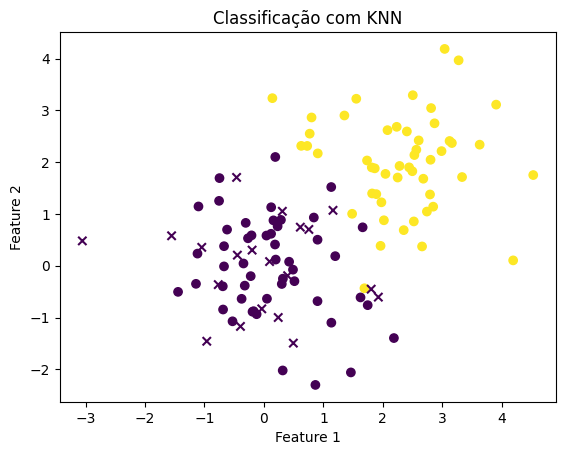

In [ ]:
# Plotando os resultados
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=Y_test_pred)
plt.title('Classificação com KNN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Exercício 3.1

Vamos agora usar o mesmo classificador KNN para classificar imagens, utilizando um dataset de imagens dermatoscópicas de lesões de pele comuns.

**Dataset**

O dataset consiste em 500 imagens de lesões de pele, obtidas ao longo de 20 anos em dois hospitais diferentes. Como as imagens foram obtidas e armazenadas de diferentes formas ao longo do tempo (armazenadas em arquivos PowerPoint, por exemplo), elas passaram por um processo de seleção, organização e padronização para compor o dataset. Assim, as imagens foram cortadas em torno das lesões de modo a deixá-las centralizadas e, em alguns casos, tiveram seus histogramas corrigidos manualmente para melhorar o contraste visual e a reprodução de cores.

As imagens estão divididas em dois tipos de lesão de pele:
- 250 casos de carcinoma basocelular (label 0) - um tipo de câncer de pele que começa nas células basais, raramente apresenta metástase, mas cresce de forma destrutiva se não tratado;
- 250 casos de melanoma (label 1) - o tipo mais grave de câncer de pele, que começa nas células produtoras de melanina, é quase sempre curável em estágios iniciais, mas tende a apresentar metástase com o tempo.

**Classificação**

O dataset está separado em um conjunto de treino com 400 imagens (200 de cada classe) e um conjunto de teste com 100 imagens (50 de cada classe).

Neste caso, ao invés de utilizar dados aleatórios para treinamento e teste, vamos extrair os atributos dos histogramas dos conjuntos de imagens. Os atributos serão utilizadas como dados de entrada do modelo. As imagens devem ser classificadas em 0 ou 1, representando os dois tipos de lesões presentes no dataset (carcinoma ou melanoma, respectivamente).

O código abaixo cria os conjuntos de treino e teste (imagens e labels) utilizando as imagens disponíveis no dataset.

In [ ]:
path = f"gdrive/MyDrive/{pasta_compartilhada}/Dados/Ex02/Derma_MNIST_Dataset/"

images_train = []
labels_train = []
images_test = []
labels_test = []

list_dir = os.listdir(path)

for dir in list_dir:
  list_labels = os.listdir(os.path.join(path,dir))
  for l in list_labels:
    list_files = os.listdir(os.path.join(path,dir,l))
    for f in list_files:
      img = mpimg.imread(os.path.join(path,dir,l,f))
      if dir == 'train':
        images_train.append(img)
        labels_train.append(int(l))
      else:
        images_test.append(img)
        labels_test.append(int(l))

print(f'labels_train: \n{labels_train}')
print('Número de imagens de treino:', len(labels_train))

print(f'labels_test: \n{labels_test}')
print('Número de imagens de teste:', len(labels_test))

labels_train: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Agora, vamos visualizar algumas imagens do dataset. O código abaixo seleciona e plota quatro imagens aleatórias de cada classe do conjunto de treino. Tente executá-lo algumas vezes e comparar as duas classes visualmente.

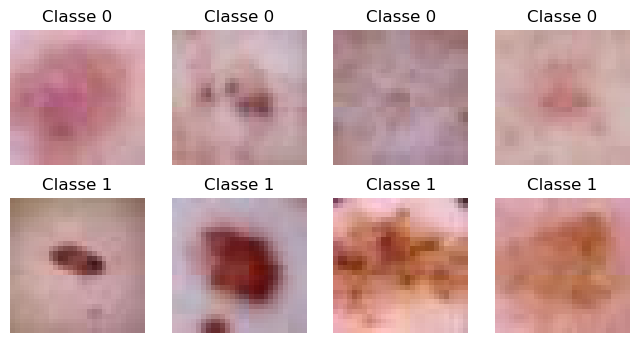

In [ ]:
images_train[random.randint(0,199)]
images_train[random.randint(200,399)]

n_imgs = 4
fig, axs = plt.subplots(2,n_imgs,figsize=(8, 4))

for n in range(n_imgs):
  plt.subplot(2,n_imgs,n+1)
  plt.axis('off')
  tmp = random.randint(0,199)
  plt.imshow(images_train[tmp])
  plt.title(f'Classe {labels_train[tmp]}')

  plt.subplot(2,n_imgs,n+n_imgs+1)
  plt.axis('off')
  tmp = random.randint(200,399)
  plt.imshow(images_train[tmp])
  plt.title(f'Classe {labels_train[tmp]}')

**a)** Crie uma função que receba um conjunto de imagens RGB, transforme as imagens em *grayscale*, e extraia os atributos do histograma de cada imagem. A função deve retornar os atributos dos histogramas concatenados em um vetor de atributos. Utilize a função **"histstat"** dada nesse notebook para extração de atributos.

Utilize os conjuntos de dados criados anteriormente para obter os vetores de atributos das amostras de treino e teste (train_features e test_features).

**Atenção!** Para o conjunto de treino você deve obter uma matriz 400 x 9, onde cada linha corresponde a uma amostra (imagem) e cada coluna correponde a um atributo do histograma. Da mesma forma, para o conjunto de teste você deve obter uma matriz 100 x 9.

In [ ]:
def atrib_conjunto(imagens):
  atributos = np.zeros((len(imagens), 9))
  i = -1
  for imagem in imagens:
    i = i + 1
    imagem_gray = np.uint8(0.3*imagem[:,:,0]+0.59*imagem[:,:,1]+0.11*imagem[:,:,2])
    atributos[i] = histstat(imagem_gray)
  return atributos

train_features = atrib_conjunto(images_train)
print("train:\n", np.shape(train_features))
test_features = atrib_conjunto(images_test)
print("test:\n", np.shape(test_features))

train:
 (400, 9)
test:
 (100, 9)


**b)** Treine um modelo kNN utilizando o conjunto de dados de treino criado (train_features). Você precisará escolher um valor de k. Valide o modelo utilizando o conjunto de dados de teste (test_features). Calcule as métricas de avaliação do classificador para ambos os conjuntos de dados (primeiro para treino, depois para teste): acurácia, precisão, revocação e F1-score. Imprima a [Matriz de Confusão](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).


In [ ]:
# Criando o modelo KNN
model = KNeighborsClassifier(n_neighbors=12)

# Treinando o modelo
model.fit(train_features, labels_train);

# Classificando as amostras
train_predictions = model.predict(train_features)
testing_predictions = model.predict(test_features)

# Avaliando o modelo com conjunto de treinamento
acc = accuracy_score(labels_train, train_predictions)
prec = precision_score(labels_train, train_predictions)
rec = recall_score(labels_train, train_predictions)
f1 = f1_score(labels_train, train_predictions)

# Imprimindo as métricas para conjunto de treinamento
print('TREINAMENTO:\nAcurácia: %.2f' % acc)
print('Precisão: %.2f' % prec)
print('Recall: %.2f' % rec)
print('F1-Score: %.2f\n' % f1)

# Avaliando o modelo com conjunto de teste
acc = accuracy_score(labels_test, testing_predictions)
prec = precision_score(labels_test, testing_predictions)
rec = recall_score(labels_test, testing_predictions)
f1 = f1_score(labels_test, testing_predictions)

# Imprimindo as métricas para conjunto de teste
print('TESTE:\nAcurácia: %.2f' % acc)
print('Precisão: %.2f' % prec)
print('Recall: %.2f' % rec)
print('F1-Score: %.2f\n' % f1)

# Imprimindo matriz de confusao do conjunto de treinamento
print("MATRIZ TREINAMENTO:\n", confusion_matrix(labels_train, train_predictions), "\n")

# Imprimindo matriz de confusao do conjunto de testes
print("MATRIZ TESTE:\n", confusion_matrix(labels_test, testing_predictions))

TREINAMENTO:
Acurácia: 0.81
Precisão: 0.80
Recall: 0.81
F1-Score: 0.81

TESTE:
Acurácia: 0.79
Precisão: 0.80
Recall: 0.78
F1-Score: 0.79

MATRIZ TREINAMENTO:
 [[160  40]
 [ 38 162]] 

MATRIZ TESTE:
 [[40 10]
 [11 39]]


**c)** Tente plotar os resultados da classificação usando os atributos 2 a 2 como eixos (por exemplo, os valores de variância no eixo y e os valores de média no eixo x). Utilize a função [scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) do matplotlib, já demonstrada no início da Parte 3 deste notebook. As amostras de treinamento devem ser plotadas com pontos circulares, enquanto as amostras de teste devem ser plotadas com pontos cruzados. Comente os resultados obtidos.

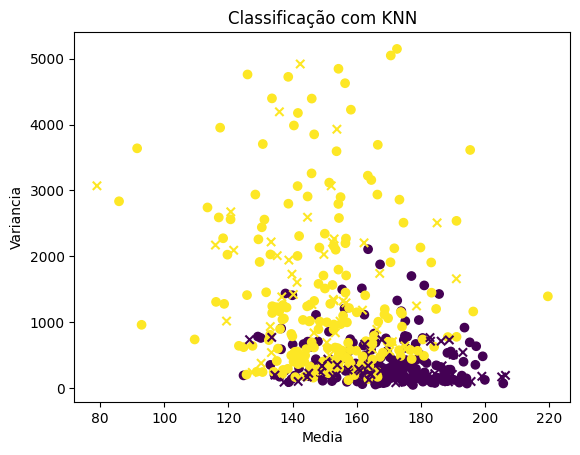

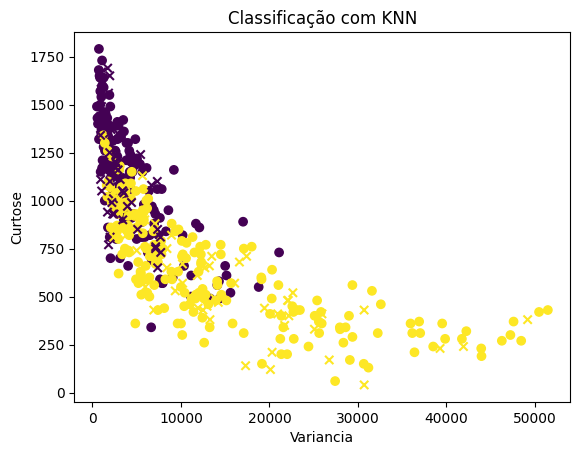

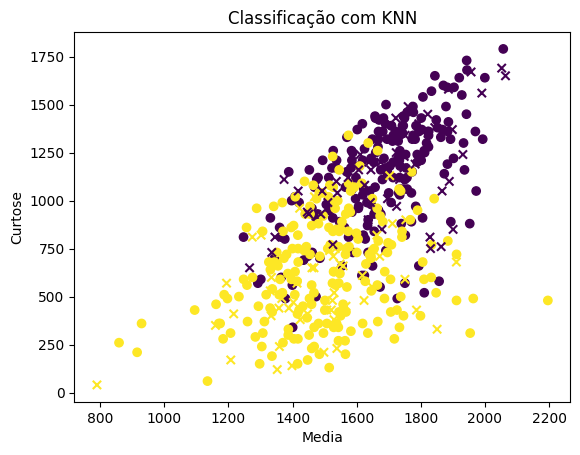

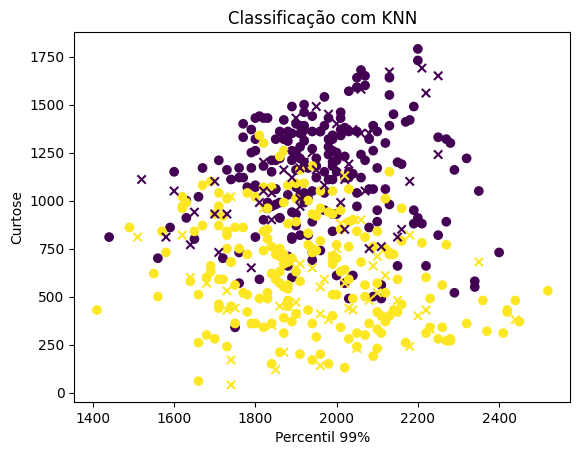

In [194]:
plt.scatter(train_features[:, 0], train_features[:, 1], c=labels_train)
plt.scatter(test_features[:, 0], test_features[:, 1], marker='x', c=testing_predictions)
plt.title('Classificação com KNN')
plt.xlabel('Media')
plt.ylabel('Variancia')
plt.show()

plt.scatter(10*train_features[:, 1], 10*train_features[:, 4], c=labels_train)
plt.scatter(10*test_features[:, 1], 10*test_features[:, 4], marker='x', c=testing_predictions)
plt.title('Classificação com KNN')
plt.xlabel('Variancia')
plt.ylabel('Curtose')
plt.show()

plt.scatter(10*train_features[:, 0], 10*train_features[:, 4], c=labels_train)
plt.scatter(10*test_features[:, 0], 10*test_features[:, 4], marker='x', c=testing_predictions)
plt.title('Classificação com KNN')
plt.xlabel('Media')
plt.ylabel('Curtose')
plt.show()

plt.scatter(10*train_features[:, 8], 10*train_features[:, 4], c=labels_train)
plt.scatter(10*test_features[:, 8], 10*test_features[:, 4], marker='x', c=testing_predictions)
plt.title('Classificação com KNN')
plt.xlabel('Percentil 99%')
plt.ylabel('Curtose')
plt.show()

# Apos algumas tentativas diferentes, foi possivel notar que as duas classes se distinguem entre
# si, principalmente, nos quesitos variancia, curtose e media (aparentemente nesta ordem). Logo
# Os plots mais faceis de se analisar visualmente a eficacia do modelo sao aqueles cujos eixos
# sao, ao menos um deles, a variancia, a curtose ou a media. Assim, eh possivel analisar os
# graficos expostos a seguir para entender os resultados das metricas de avaliacao.


**d)** Comente os resultados obtidos: Você está satisfeito com o resultado? O que você pode inferir do seu classificador ao observar as métricas obtidas? Qual o erro mais frequente? Quais modificações poderiam ser feitas para tentar obter melhores resultados?

Resposta: O resultado foi consideravelmente satisfatório, principalmente considerando que usa apenas dados do histograma como critérios de classificação. Isso porque, as métricas todas beiram ou ultrapassam os 80%, conferindo ao modelo uma taxa razoável de acertos! No entanto, considerando que o intuito do modelo é detectar lesões cancerígenas de pele e distinguir entre seus tipos e, que seus tratamentos talvez sejam diferentes, seria importante ter uma taxa de acertos melhor.

Analisando as matrizes de confusão, não parece haver um padrão de erros, sendo que o modelo errou praticamente o mesmo número de vezes para ambas as classes de lesões de pele.

Para melhorar os resultados, talvez fosse interessante usar menos features dos histogramas, focando naqueles que são mormente distintivos entre as classes. Além disso, um outro modo de melhorar o modelo, seria considerar mais características da imagem além daquelas retratadas pelo histograma, que permitam uma distinção mais fácil entre as duas imagens.

### Exercício 3.2

Tente melhorar os resultados de classificação. Algumas sugestões:

- Redimensione as imagens para um tamanho menor **(14, 14)**, isso pode deixar os atributos menos suceptíveis a ruídos e detalhes, focando a classificação em características mais gerais;
- Altere o valor de vizinhos k;
- Em problemas de classificação, especialmente quando temos poucas amostras e muitos atributos, temos o "mal da dimensionalidade". A seleção de atributos pode ser utilizada para contornar esse problema e remover atributos reduntantes (correlacionados) ou irrelevantes. Você pode escolher atributos aleatoriamente, fazer uma análise estatística dos atributos correlacionados, ou ainda fazer uma análise visual. Pode também usar técnicas específicas de seleção de atributos ([feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection)).

In [243]:
# Tentou-se melhorar o modelo para que tivesse melhores resultados nas metricas analisadas.
# Para tanto, foi alterado o numero de vizinhos a serem analisado, obtendo um resultado
# melhor que aquele obtido anteriormente. Além disso, outra forma para melhorar os resultados
# foi reduzir o tamanho da imagem. Para isso, experimentou-se reduzi-la para (14,14), o que
# apenas piorou os resultados, mas, ao tentar a reducao para (7,7), o resultado melhorou
# consideravelmente, atingindo em uma das metricas o valor de 87%. Assim, ganhou-se 6% a mais
# na metrica de maior nota quando comparado o modelo atual ao anterior, cuja maior metrica
# teve como resultado o valor 81%.

path = f"gdrive/MyDrive/{pasta_compartilhada}/Dados/Ex02/Derma_MNIST_Dataset/"

images_train = []
labels_train = []
images_test = []
labels_test = []

list_dir = os.listdir(path)

for dir in list_dir:
  list_labels = os.listdir(os.path.join(path,dir))
  for l in list_labels:
    list_files = os.listdir(os.path.join(path,dir,l))
    for f in list_files:
      if dir == 'train':
        img = Image.open(os.path.join(path,dir,l,f))
        img_res = img.resize((7,7)) #altera o tamanho da imagem
        img_res_num = np.array(img_res)
        images_train.append(img_res_num)
        labels_train.append(int(l))
      else:
        img = Image.open(os.path.join(path,dir,l,f))
        img_res = img.resize((7,7)) #altera o tamanho da imagem
        img_res_num = np.array(img_res)
        images_test.append(img_res_num)
        labels_test.append(int(l))

test_features = atrib_conjunto(images_train)
test_features = atrib_conjunto(images_test)

# Criando o modelo KNN
model = KNeighborsClassifier(n_neighbors=8) # Alterando o valor do numero de vizinhos para 8, temos uma
# melhora consideravel nas metricas calculadas

# Treinando o modelo
model.fit(train_features, labels_train);

# Classificando as amostras
train_predictions = model.predict(train_features)
testing_predictions = model.predict(test_features)

# Avaliando o modelo com conjunto de treinamento
acc = accuracy_score(labels_train, train_predictions)
prec = precision_score(labels_train, train_predictions)
rec = recall_score(labels_train, train_predictions)
f1 = f1_score(labels_train, train_predictions)

# Imprimindo as métricas para conjunto de treinamento
print('TREINAMENTO:\nAcurácia: %.2f' % acc)
print('Precisão: %.2f' % prec)
print('Recall: %.2f' % rec)
print('F1-Score: %.2f\n' % f1)

# Avaliando o modelo com conjunto de teste
acc = accuracy_score(labels_test, testing_predictions)
prec = precision_score(labels_test, testing_predictions)
rec = recall_score(labels_test, testing_predictions)
f1 = f1_score(labels_test, testing_predictions)

# Imprimindo as métricas para conjunto de teste
print('TESTE:\nAcurácia: %.2f' % acc)
print('Precisão: %.2f' % prec)
print('Recall: %.2f' % rec)
print('F1-Score: %.2f\n' % f1)

# Imprimindo matriz de confusao do conjunto de treinamento
print("MATRIZ TREINAMENTO:\n", confusion_matrix(labels_train, train_predictions), "\n")

# Imprimindo matriz de confusao do conjunto de testes
print("MATRIZ TESTE:\n", confusion_matrix(labels_test, testing_predictions))

TREINAMENTO:
Acurácia: 0.80
Precisão: 0.80
Recall: 0.79
F1-Score: 0.80

TESTE:
Acurácia: 0.84
Precisão: 0.87
Recall: 0.80
F1-Score: 0.83

MATRIZ TREINAMENTO:
 [[161  39]
 [ 42 158]] 

MATRIZ TESTE:
 [[44  6]
 [10 40]]


## Parte 4 - Utilizando atributos de histograma de imagens coloridas (opicional para EA979)

Note que, ao realizar a transformação das imagens coloridas para imagens em escala de cinza na Parte 3 deste notebook, estamos desconsiderando características e informações das imagens com potencial para ajudar no processo de classificação.

### Exercício 4.1

Repita o processo de classificação do dataset de imagens dermatoscópicas, mas desta vez utilizando atributos de histograma extraídos diretamente das imagens coloridas (sem transformá-las para escala de cinza). Explique como a extração de atributos foi realizada e comente sobre os resultados obtidos. Lembre-se de tentar aplicar também as modificações utilizadas no exercício 3.2 para melhorar os resultados de classificação. Alguma das bandas da imagem se mostrou mais eficaz para a classificação? Os resultados de classificação foram melhores ou piores em relação a utilizar as imagens em escala de cinza? Comente.

In [ ]:
# Seu código aqui

## Parte 5 - Explorando atributos de textura (opicional para EA979)

Além dos atributos de histograma, existem diversos outros tipos de atributos que podem ser extraídos de imagens digitais, como os atributos de textura, por exemplo. No processamento de imagens, a textura pode ser definida em função da variação espacial da intensidade dos pixels em uma região da imagem. Os atributos de textura são úteis para caracterizar padrões em uma imagem, como rugosidade, suavidade, granulosidade, entre outros. Assim, a análise de textura desempenha um papel importante em casos de visão computacional, como reconhecimento de objetos, detecção de defeitos de superfície, reconhecimento de padrões, análise de imagens médicas, etc.

**Para saber mais sobre atributos de textura, verifique os materiais de apoio disponibilizados no classroom.**

### Exercício 5.1

Extraia atributos de textura (como [GLCM](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_glcm.html), por exemplo) e repita a classificação. Comente sobre o método de extração de atributos escolhido (como funciona? quais seus parâmetros? que atributos consegue extrair?) e os resultados obtidos.

In [ ]:
# Seu código aqui